In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('medical_insurance.csv')
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df['smoker'] = df['smoker'].replace({'yes':0,'no':1})
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,0,southwest,16884.92400
1,18,male,33.770,1,1,southeast,1725.55230
2,28,male,33.000,3,1,southeast,4449.46200
3,33,male,22.705,0,1,northwest,21984.47061
4,32,male,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,1,northwest,10600.54830
1334,18,female,31.920,0,1,northeast,2205.98080
1335,18,female,36.850,0,1,southeast,1629.83350
1336,21,female,25.800,0,1,southwest,2007.94500


In [8]:
df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,0,16884.92400,False,False,False,True
1,18,male,33.770,1,1,1725.55230,False,False,True,False
2,28,male,33.000,3,1,4449.46200,False,False,True,False
3,33,male,22.705,0,1,21984.47061,False,True,False,False
4,32,male,28.880,0,1,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,1,10600.54830,False,True,False,False
1334,18,female,31.920,0,1,2205.98080,True,False,False,False
1335,18,female,36.850,0,1,1629.83350,False,False,True,False
1336,21,female,25.800,0,1,2007.94500,False,False,False,True


In [9]:
df['sex'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [10]:
df['sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [11]:
df['sex'].value_counts().to_dict()

{0: 676, 1: 662}

<Axes: xlabel='age'>

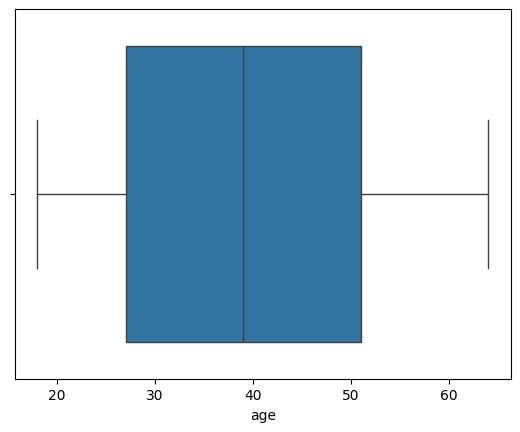

In [12]:
sns.boxplot(df['age'], orient='h')

<Axes: xlabel='bmi'>

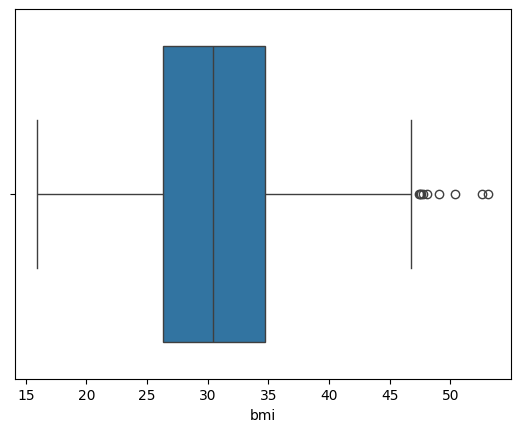

In [13]:
sns.boxplot(df['bmi'], orient='h')

In [14]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [15]:
df['bmi'].median()

np.float64(30.4)

In [16]:
Q3 = df['bmi'].quantile(0.75)
Q1 = df['bmi'].quantile(0.25)
iqr = Q3 - Q1
upperlimit = Q3 + 1.5*iqr
upperlimit

np.float64(47.290000000000006)

In [17]:
df['bmi'] = np.where(df['bmi'] > upperlimit, df['bmi'].median(), df['bmi'])

<Axes: xlabel='bmi'>

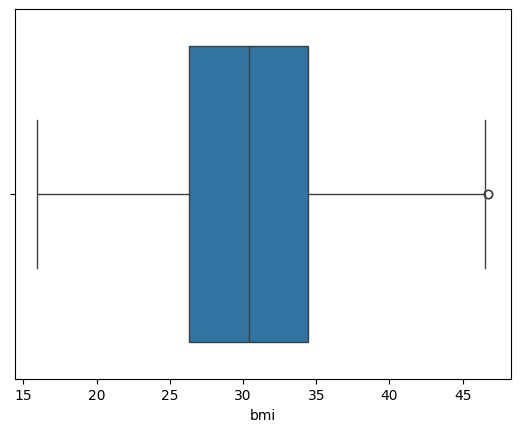

In [18]:
sns.boxplot(df['bmi'], orient='h')

In [19]:
#Train Test Split
x= df.drop('charges', axis=1)
y = df['charges']

In [20]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [21]:
#Model Training

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
def model_eval(model, ind_var, act):
    
    pred = model.predict(ind_var)
    mse = mean_squared_error(act, pred)
    rmse = np.sqrt(mse)
    mae= mean_absolute_error(act , pred)
    r2_val = r2_score(act,pred)
    
    return {"mse": mse, "rmse": rmse, "mae": mae, "r2_val": r2_val}

print("Testing Data Evaluation: \n", model_eval(model, x_test, y_test))
print("Training Data Evaluation: \n", model_eval(model, x_train, y_train),'\n')

Testing Data Evaluation: 
 {'mse': np.float64(37943038.06659236), 'rmse': np.float64(6159.79204734968), 'mae': np.float64(4222.16960301878), 'r2_val': 0.7473508749250467}
Training Data Evaluation: 
 {'mse': np.float64(36470871.98160082), 'rmse': np.float64(6039.111853708359), 'mae': np.float64(4131.796882463347), 'r2_val': 0.7494730816338498} 



In [24]:
df.iloc[4]

age                        32
sex                         0
bmi                     28.88
children                    0
smoker                      1
charges             3866.8552
region_northeast        False
region_northwest         True
region_southeast        False
region_southwest        False
Name: 4, dtype: object

In [26]:
model.predict([[32,0 , 28.88,  0 ,  1 ,  0 ,  1 ,  0 ,  0 ]])

array([5491.76831112])

In [29]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [30]:
with open('LinearReg_Model.pkl','wb') as f:
    pickle.dump(model,f)

In [31]:
column_data = {'columns': list(x.columns),'sex':{'male':1,'female':0},'smoker':{'no':1,'yes':0}}
column_data

{'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest'],
 'sex': {'male': 1, 'female': 0},
 'smoker': {'no': 1, 'yes': 0}}

In [33]:
with open('column_data.json','w') as f:
    json.dump(column_data,f)